In [1]:
import numpy as np
with open('logits.txt', 'r') as f:
    str=f.read()
    str = [s.split(',') for s in str.split('\n')]

logits_np = np.array([[float(x) for x in y] for y in str], dtype= np.float32)

In [2]:
with open('labels.txt', 'r') as f:
    str = f.read()
labels_np = np.array([int(s) for s in str.split('\n')], dtype=np.int32)

In [3]:
from recalibration import *
from calibration_library import metrics
uncalibrated = np.array([np.exp(x)/np.sum(np.exp(x)) for x in logits_np], dtype=np.float32)
cnt = 0
for i, p in enumerate(uncalibrated):
    if np.argmax(p) == labels_np[i]:
        cnt+=1
print('accr : ', cnt/len(uncalibrated))

/home/shawnman99/anaconda3/envs/shawn99/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


accr :  0.9942075623491553


In [4]:
#Histo = HistogramBinning(logits_np, labels_np, 15)
#Histo.fit_histogram()

In [5]:
tempcel = TemperatureScailing(logits_np, labels_np)
tempcel.fit_temperature()

Before temperature - NLL : 0.028185
After temperature - NLL : 0.021907


In [6]:
ece = metrics.ECELoss()
#calibrated = Histo.calibrate()
#temp = 2.242
#calibrated = np.array([np.exp(x/temp)/np.sum(np.exp(x/temp)) for x in logits_np], dtype=np.float32)
calibrated = tempcel.calibrate()
print(ece.loss(uncalibrated, labels_np, 15, False), ece.loss(calibrated, labels_np, 15, False))
print(uncalibrated[178])

0.0038052232823636515 0.0019142936365506632
[1.1881842e-06 3.1448369e-06 4.1876709e-07 9.9998212e-01 8.2258629e-07
 1.2300457e-05]


In [7]:
mce = metrics.MCELoss()
print(mce.loss(uncalibrated, labels_np, 15, False), mce.loss(calibrated, labels_np, 15, False))
print(uncalibrated[178])

0.3484073281288147 0.4210316419601441
[1.1881842e-06 3.1448369e-06 4.1876709e-07 9.9998212e-01 8.2258629e-07
 1.2300457e-05]


In [8]:
sce = metrics.SCELoss()
print(sce.loss(uncalibrated, labels_np, 15, False), sce.loss(calibrated, labels_np, 15, False))
print(uncalibrated[178])

0.8327182905740474 0.8321306367660815
[1.1881842e-06 3.1448369e-06 4.1876709e-07 9.9998212e-01 8.2258629e-07
 1.2300457e-05]


In [9]:
ace = metrics.ACELoss()
print(ace.loss(uncalibrated, labels_np, 15, False), ace.loss(calibrated, labels_np, 15, False))


0.8315484553304805 0.8314232923421921


In [10]:
from copy import deepcopy
tmp = deepcopy(uncalibrated)
tmplb = deepcopy(labels_np)
tmpca = deepcopy(calibrated)
tace = metrics.TACELoss()
print(tace.loss(tmp, tmplb, logits = False), tace.loss(tmpca, labels_np, logits = False))
print(uncalibrated[178])

0.0018545327323408222 0.0057583549266272
[1.1881842e-06 3.1448369e-06 4.1876709e-07 9.9998212e-01 8.2258629e-07
 1.2300457e-05]


In [11]:
print(ece.bin_acc)
print(tace.bin_acc)

[0.         0.         0.         0.         0.         0.8
 0.42857143 0.42857143 0.58333333 0.5        0.62162162 0.78947368
 0.74576271 0.80314961 0.9981429 ]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.89126853]


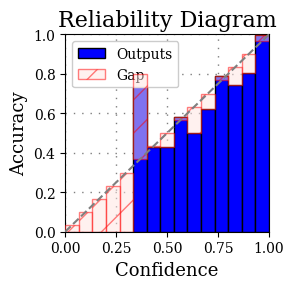

In [12]:
p = draw_rel_diagram(ece.bin_acc, 15, 'Reliability Diagram')
p.savefig('output.png')

In [13]:
print(tempcel.optim_temp)

1.5097726583480835
